In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Arpit_Jaiswal_2020 (10).pdf'
'Arpit_Jaiswal_2020 (1).pdf'
'Arpit_Jaiswal_2020 (2).pdf'
'Arpit_Jaiswal_2020 (3).pdf'
'Arpit_Jaiswal_2020 (4).pdf'
'Arpit_Jaiswal_2020 (5).pdf'
'Arpit_Jaiswal_2020 (6).pdf'
'Arpit_Jaiswal_2020 (7).pdf'
'Arpit_Jaiswal_2020 (8).pdf'
'Arpit_Jaiswal_2020 (9).pdf'
 Arpit_Jaiswal_2020.pdf
'Arpit_Jaiswal_Oct2020 (1).pdf'
'Arpit_Jaiswal_Oct2020 (2).pdf'
 Arpit_Jaiswal_Oct2020.pdf
'Arpit_Jaiswal_wavemaker_DataScience - Arpit Jaiswal.pdf'
 Arpit_Jaiswal_wavemaker_DataScience.pdf
 Assignment
 CheatSheet
'Colab Notebooks'
 Coursera
'cover letter.gdoc'
 CV
'data science book'
 DataScienceBookV3.pdf
 final_5e3854ec9b75090016715eee_116018.mp4
'first dataset.gsheet'
 IMG_20200201_184659_01.jpg
 IMG_20200202_003559.jpg
 IMG-20200202-WA0013.jpg
 IMG-20200203-WA0079.jpg
 IMG-20200203-WA0113.jpg
 inbound5151465485633723606.pdf
 itemization_resutl_t

In [ ]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,len,Total_Tags
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,295,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,99,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,81,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,116,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0,189,0


In [ ]:
path = '/content/drive/MyDrive/Assignment/securly/dataset/dataset/train.csv/train.csv'
df = pd.read_csv(path)


In [ ]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
df['len'] = df['comment_text'].str.len()

In [ ]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,len
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


In [ ]:
print(df.shape)
n = df.shape[0]

(159571, 9)


In [ ]:
tags = ['toxic', 'severe_toxic','obscene', 'threat', 'insult', 'identity_hate']


,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


class toxic appear max no. of times with 9% of data
class severe toxic min no. of times with .9% of data


In [ ]:
df['Total_Tags'] = df['toxic'] + df['severe_toxic'] + df['obscene'] + df['threat'] + df['insult'] + df['identity_hate']

In [ ]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,len,Total_Tags
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,0


In [ ]:
print('safe comments: ',df[df['Total_Tags'] == 0].shape[0]/n*100, '%')

safe comments:  89.83211235124176 %


In [ ]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,len,Total_Tags
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,394.073221,0.219952
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,590.720282,0.748260
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,435.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5000.000000,6.000000


In [ ]:
(df.isna().sum()/n*100).reset_index()

,index,0
0,id,0.0
1,comment_text,0.0
2,toxic,0.0
3,severe_toxic,0.0
4,obscene,0.0
5,threat,0.0
6,insult,0.0
7,identity_hate,0.0
8,len,0.0
9,Total_Tags,0.0


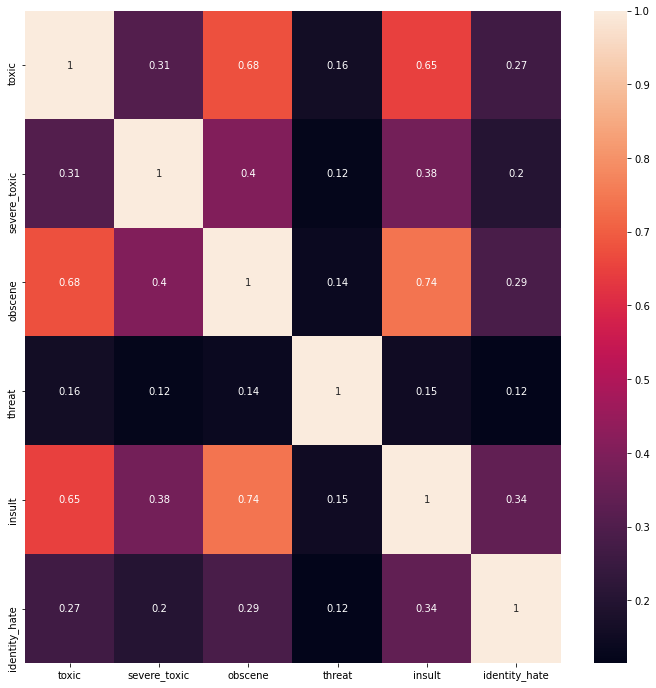

In [ ]:
correlation = df[tags].corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation,annot= True)

In [ ]:
from wordcloud import WordCloud ,STOPWORDS

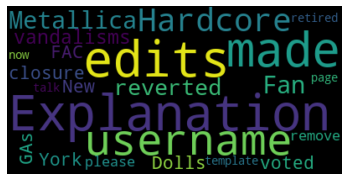

In [ ]:
wordcloud = WordCloud().generate(df['comment_text'][0])

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
stopwords = set(STOPWORDS) 
for comment in df.comment_text:
  comment_words = ''
  com = str(comment)
  tokens = val.split() 
      
  # Converts each token into lowercase 
  for i in range(len(tokens)): 
    tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 